# WeatherPy
----

### Analysis
There is almost no relationship between wind speed an latitude; wind speed relies more on geography and landscape features than lattitude; ie forested areas are not windy because the forests break in the winds; but coastal areas and plains are windy because of constantly changing pressure systems.

There is a relationship of sorts between humidity and latitude, but that seems to be most within the northern landmasses as opposed to the southern. This is due to the fact that since the majority of the landmass is in the northern hemisphere, the vast majority of perceieved humidity in the air will be there.

There is a definitive relationship between latitudes and temperature... the arctic and antarctic are cold, and frozen (for now anyway...)

---

#### Note
* TEMPERATURES ARE IN Celcius!! NOT FAHRENHEIT... THIS ISN'T 1820! USE METRIC

In [ ]:
#!pip install citipy - once completed no longer need

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib.parse
from pprint import pprint
import scipy.stats as st

# Import API key
import api_keys
api_key = api_keys.api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['kavieng',
 'huarmey',
 'cherskiy',
 'saskylakh',
 'kaitangata',
 'rome',
 'tagusao',
 'port alfred',
 'lexington',
 'kropotkin',
 'puerto ayora',
 'mataura',
 'ribeira grande',
 'hilo',
 'issia',
 'ambon',
 'new norfolk',
 'vaini',
 'gat',
 'taolanaro',
 'chenove',
 'rikitea',
 'pyshma',
 'khatanga',
 'marcona',
 'zyryanovsk',
 'santander',
 'qaanaaq',
 'albany',
 'bengkulu',
 'jimo',
 'lavrentiya',
 'pangnirtung',
 'lolua',
 'bilma',
 'hambantota',
 'arraial do cabo',
 'yellowknife',
 'marsa matruh',
 'anadyr',
 'newport',
 'punta arenas',
 'bathsheba',
 'port hueneme',
 'petropavlovsk-kamchatskiy',
 'mayfield',
 'busselton',
 'nikolskoye',
 'salalah',
 'illoqqortoormiut',
 'myaundzha',
 'daru',
 'mount vernon',
 'kruisfontein',
 'ekhabi',
 'ushuaia',
 'mount gambier',
 'castro',
 'verkhnyaya inta',
 'boca do acre',
 'nisia floresta',
 'riyadh',
 'tabory',
 'haibowan',
 'sentyabrskiy',
 'atuona',
 'hamminkeln',
 'porto nacional',
 'esperance',
 'abha',
 'bara',
 'aswan',
 'sangar',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
len(cities)

620

In [31]:
#check if we got the code right
x = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={cities[0]}&appid={api_key}').json()
pprint(x)

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -2.57, 'lon': 150.8},
 'dt': 1604771788,
 'id': 2094342,
 'main': {'feels_like': 302.79,
          'grnd_level': 1008,
          'humidity': 70,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 301.08,
          'temp_max': 301.08,
          'temp_min': 301.08},
 'name': 'Kavieng',
 'sys': {'country': 'PG', 'sunrise': 1604777642, 'sunset': 1604821626},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 91, 'speed': 4.23}}


In [36]:
x['coord']['lat']

-2.57

In [70]:
#Create empty arrays/lists that will for the api call


url = 'api.openweathermap.org/data/2.5/weather?q={city_name}&appid={api_key}'


# city_name = []
# country = []
# date_temp = []
# longitude =[] #always put the long first, this is the x axis!
# latitude = []

# humidity=[] #the bane of my existance!!
# clouds =[]
# max_temp=[]
# winds=[]

pre_df=[]

#the number of given cities is far too long! I will only use 150 as the api only allows 60 calls per second.
#I used the UrlLib.Parse function to take out spaces within the city names, as I was recieving errors

for city in cities[:300]:
    
    try:
        response = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={urllib.parse.quote(city)}&appid={api_key}').json()
        city_name=response['name']
        country=response['sys']['country']
        date_temp = response['dt']
        longitude = response['coord']['lon']
        latitude = response['coord']['lat']
        humidity = response['main']['humidity']
        clouds = response['clouds']['all']
        max_temp = response['main']['temp_max']
        winds = response['wind']['speed']
        
        city_info={
            'City Name': city_name,
            'Country': country,
            'Date':date_temp,
            'Longitude':longitude,
            'Latitude':latitude,
            'Humidity':humidity,
            'Cloud Cover':clouds,
            'Temp K': max_temp,
            'Winds':winds
        }
        
        pre_df.append(city_info)
        print(f'{city} is being appened to list')
        
    except: #if the city we are looking for isn't in the list
        print(f'{city} is not in generated list.' )

print('---------------------------------------------')
print('Complete')

kavieng is being appened to list
huarmey is being appened to list
cherskiy is being appened to list
saskylakh is being appened to list
kaitangata is being appened to list
rome is being appened to list
tagusao is being appened to list
port alfred is being appened to list
lexington is being appened to list
kropotkin is being appened to list
puerto ayora is being appened to list
mataura is being appened to list
ribeira grande is being appened to list
hilo is being appened to list
issia is being appened to list
ambon is being appened to list
new norfolk is being appened to list
vaini is being appened to list
gat is being appened to list
taolanaro is not in generated list.
chenove is being appened to list
rikitea is being appened to list
pyshma is being appened to list
khatanga is being appened to list
marcona is not in generated list.
zyryanovsk is being appened to list
santander is being appened to list
qaanaaq is being appened to list
albany is being appened to list
bengkulu is being app

In [75]:
weather_data=pd.DataFrame(pre_df)

In [98]:
def subtract_k(x):
    return x - 273

weather_data['Temp'] = weather_data['Temp K'].apply(subtract_k)
weather_data.head(10)

,City Name,Country,Date,Longitude,Latitude,Humidity,Cloud Cover,Temp K,Winds,Temp
0,Kavieng,PG,1604774797,150.80,-2.57,70,26,301.10,3.89,28.10
1,Huarmey,PE,1604774994,-78.15,-10.07,66,4,293.06,5.21,20.06
2,Cherskiy,RU,1604774837,161.30,68.75,95,100,258.68,2.86,-14.32
3,Saskylakh,RU,1604774994,114.08,71.92,89,5,250.36,3.00,-22.64
4,Kaitangata,NZ,1604774994,169.85,-46.28,73,100,281.48,3.13,8.48
5,Rome,US,1604774242,-85.16,34.26,60,90,297.04,3.10,24.04
6,Tagusao,PH,1604774994,117.81,9.19,75,100,299.72,1.18,26.72
7,Port Alfred,ZA,1604774806,26.89,-33.59,87,0,293.33,2.47,20.33
8,Lexington,US,1604774400,-84.48,37.99,37,1,295.93,2.10,22.93
9,Kropotkin,RU,1604774994,40.58,45.44,52,94,284.82,6.56,11.82


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [77]:
weather_data.dtypes

City Name       object
Country         object
Date             int64
Longitude      float64
Latitude       float64
Humidity         int64
Cloud Cover      int64
Temp K         float64
Winds          float64
dtype: object

In [78]:
weather_data.to_csv('Weather_Report_-_Raw_File.csv')
weather_data.count()

City Name      137
Country        137
Date           137
Longitude      137
Latitude       137
Humidity       137
Cloud Cover    137
Temp K         137
Winds          137
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

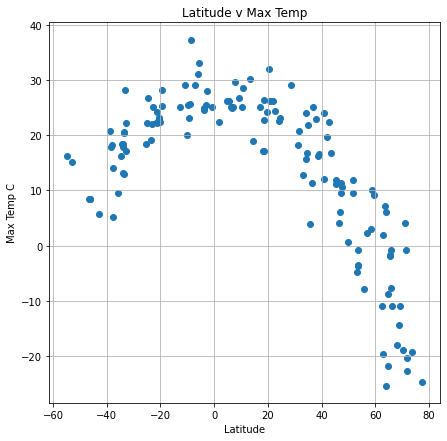

<Figure size 504x504 with 0 Axes>

In [100]:
x_lat = weather_data['Latitude'] #y axis
y_temp = weather_data['Temp'] #x axis

plt.figure(figsize = (7,7))
plt.scatter(x_lat,y_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temp C')
plt.title('Latitude v Max Temp')
plt.grid()
plt.figure(figsize = (7,7))
plt.savefig('Temp_v_Latitude.png',dpi=220)
plt.show()

#### Latitude vs. Humidity Plot

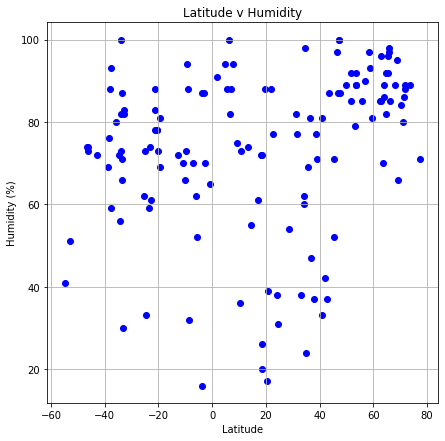

In [102]:
y_humid = weather_data['Humidity']

plt.figure(figsize =(7,7))
plt.scatter(x_lat, y_humid, facecolor='blue')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude v Humidity')
plt.grid()
plt.savefig('Humidity_v_Lat.png', dpi=220)
plt.show()

#### Latitude vs. Cloudiness Plot

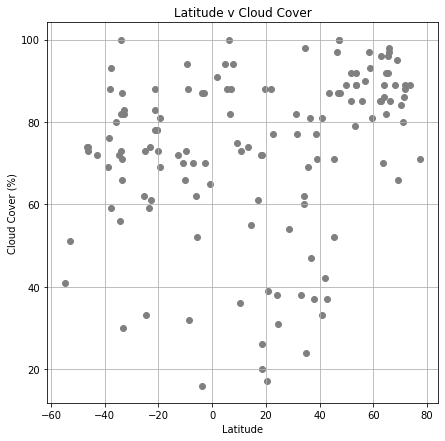

<Figure size 504x504 with 0 Axes>

In [103]:
y_cloud = weather_data['Cloud Cover']

plt.figure(figsize =(7,7))
plt.scatter(x_lat, y_humid, facecolor='grey')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover (%)')
plt.title('Latitude v Cloud Cover')
plt.grid()
plt.figure(figsize =(7,7))
plt.savefig('CloudCover.png', dpi=220)
plt.show()

#### Latitude vs. Wind Speed Plot

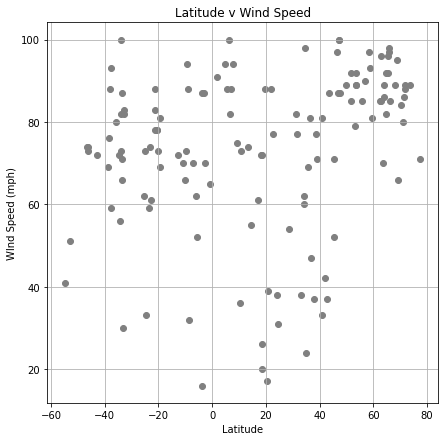

<Figure size 504x504 with 0 Axes>

In [104]:
y_wind= weather_data['Winds']

plt.figure(figsize =(7,7))
plt.scatter(x_lat, y_humid, facecolor='grey')
plt.xlabel('Latitude')
plt.ylabel('WInd Speed (mph)')
plt.title('Latitude v Wind Speed')
plt.grid()
plt.figure(figsize =(7,7))
plt.savefig('Windspeed.png', dpi=220)
plt.show()

In [86]:
#create north and southern hemispheres
north_hem = weather_data.loc[weather_data['Latitude']>0]
south_hem = weather_data.loc[weather_data['Latitude']<0]


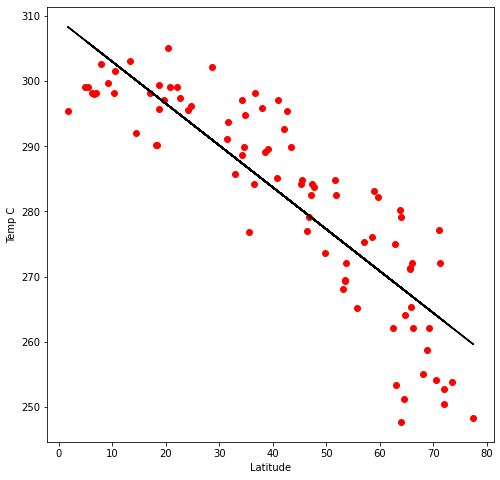

In [107]:
latitude = north_hem['Latitude']
temp = north_hem['Temp K']

slope, intercept, rvalue, pvalue, stderr, = st.linregress(latitude, temp)
reg_value = slope*latitude + intercept
eqn ='y =' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
rval = 'r = ' + str(round(rvalue,2))

plt.figure(figsize =(8,8))
plt.scatter(latitude, temp, color ='red')
plt.plot(latitude, reg_value, color = 'black')
plt.xlabel('Latitude')
plt.ylabel('Temp C')
plt.figure(figsize = (10,10))

plt.annotate(eqn,(30,30), fontsize = 12, color ='black')
plt.annotate(rval, (8, 8), fontsize = 12, color = 'black')

plt.title('Northern Hemisphere // Temp v Latitude')
plt.savefig('rvalue_north-hem.png', dpi = 220)
plt.show()
